<b>Part 1: Demonstrate "Over-fitting" and solve the same using "Dropout technique". 

Code without DropOut Technique

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8750 - loss: 0.4394 - val_accuracy: 0.8467 - val_loss: 0.4680
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8484 - loss: 0.4368 - val_accuracy: 0.8467 - val_loss: 0.4664
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8700 - loss: 0.3969 - val_accuracy: 0.8467 - val_loss: 0.4640
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8512 - loss: 0.4290 - val_accuracy: 0.8467 - val_loss: 0.4627
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8393 - loss: 0.4454 - val_accuracy: 0.8467 - val_loss: 0.4640
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8502 - loss: 0.4236 - val_accuracy: 0.8467 - val_loss: 0.4687
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8543 - loss: 0.4255 - val_accuracy: 0.8467 - val_loss: 0.4635
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8266 - loss: 0.4673 - val_accuracy: 0.8467 - 

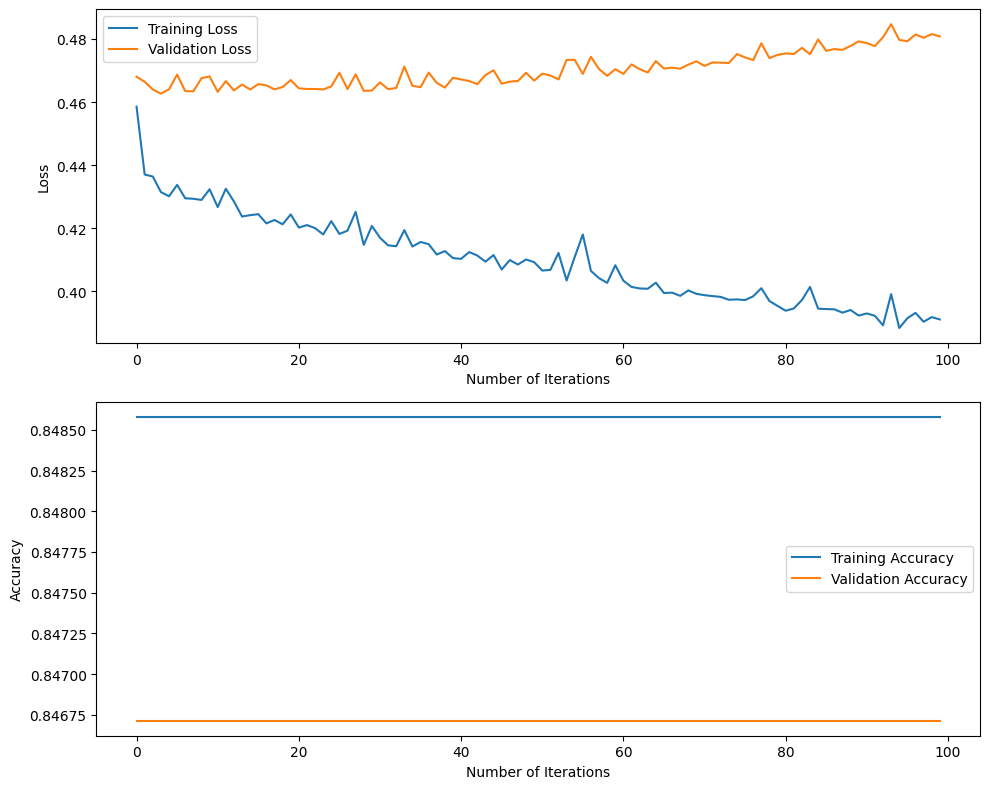

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4779 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
classification report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       116
           1       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
from sklearn.utils import resample
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


# Read data from csv file

df = pd.read_csv("C:\\Users\\91982\\Desktop\\Projects\\LIFE EXPECTANCY PREDICTION FOR POST THORACIC SURGERY - AI\\thoracic+surgery+data\\Thoracic_surgery_survival_prediction\\Data Preprocessing\\thoracic_surgery.csv")


X = df.drop(['Death_In_1yr', 'MI_6mo', 'Asthma'], axis=1)
y = df['Death_In_1yr']

y.value_counts()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)


def dl_model(X_train, X_test, Y_train, Y_test):
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # model summary
    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

    hist = model.fit(X_train, Y_train, epochs=100,validation_data=(X_test, Y_test))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot loss and validation loss on the first subplot
    ax1.plot(hist.history['loss'], label='Training Loss')
    ax1.plot(hist.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy and validation accuracy on the second subplot
    ax2.plot(hist.history['accuracy'], label='Training Accuracy')
    ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Number of Iterations')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return model


model = dl_model(X_train, X_test, Y_train, Y_test)

model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

print("classification report : \n", classification_report(Y_test, y_pred))


Code with DropOut Technique

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5428 - loss: 13.6831 - val_accuracy: 0.1533 - val_loss: 1.6603
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5766 - loss: 8.6679 - val_accuracy: 0.1752 - val_loss: 1.0854
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6386 - loss: 12.3309 - val_accuracy: 0.7080 - val_loss: 0.6467
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6061 - loss: 8.7005 - val_accuracy: 0.8467 - val_loss: 0.4952
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6263 - loss: 7.9856 - val_accuracy: 0.8467 - val_loss: 0.4698
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5540 - loss: 9.0748 - val_accuracy: 0.8467 - val_loss: 0.4850
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6122 - loss: 7.4577 - val_accuracy: 0.8467 - val_loss: 0.4970
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5825 - loss: 7.3460 - val_accuracy: 0.8467 

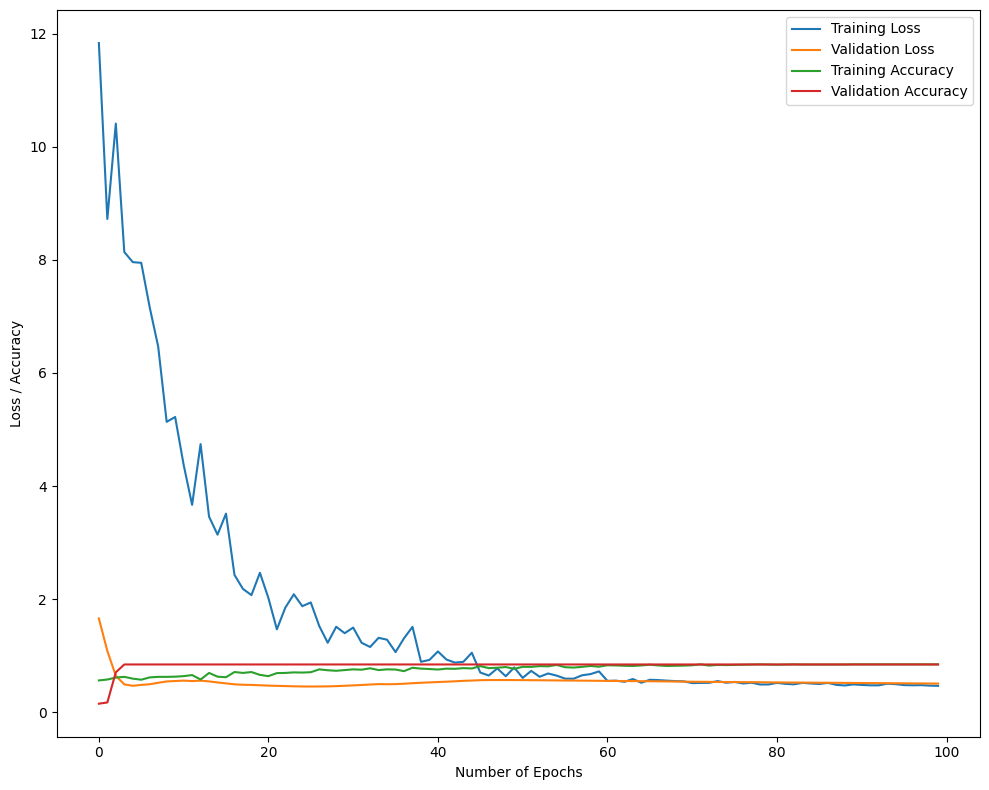

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.5134 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
classification report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       116
           1       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
from tensorflow.keras.layers import Dropout


def dl_model_with_dropout(X_train, X_test, Y_train, Y_test):
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.8))  # Adding dropout with rate 0.5
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.8
                      ))  # Adding dropout with rate 0.5
    model.add(Dense(1, activation='sigmoid'))

    # Model summary
    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

    hist = model.fit(X_train, Y_train, epochs=100,
                     validation_data=(X_test, Y_test))

    # Plotting the training history
    plt.figure(figsize=(10, 8))
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.plot(hist.history['accuracy'], label='Training Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss / Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return model


# Train the model with dropout
model_dropout = dl_model_with_dropout(X_train, X_test, Y_train, Y_test)
model_dropout.evaluate(X_test, Y_test)

y_pred = model_dropout.predict(X_test)
y_pred = y_pred.round().flatten()

print("classification report : \n", classification_report(Y_test, y_pred))

<b> Part 2: For your project definition demonstrate applicable task out of prediction and classification. 

Use model to predict the risk of death in 1 year of the patient after thoracic surgery

In [4]:
import pandas as pd
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("my_model_undersampling.keras")

# Prepare input data
# live data 2, 2.88, 2.16, 1, 0, 0, 0, 1, 1, 4, 0, 0, 0, 1, 0, 60


original_data_death = {
    'Diagnosis': 3,
    'FVC': 0.44,
    'FEV1': 0.96,
    'Performance': 2,
    'Pain': 0,
    'Haemoptysis': 1,
    'Dyspnoea': 0,
    'Cough': 1,
    'Weakness': 1,
    'Tumor_Size': 4,
    'Diabetes_Mellitus': 0,
    'PAD': 0,
    'Smoking': 0,
    'Age': 100
}
original_data_life = {
    'Diagnosis': 3,
    'FVC': 1.96,
    'FEV1': 1.4,
    'Performance': 1,
    'Pain': 0,
    'Haemoptysis': 0,
    'Dyspnoea': 0,
    'Cough': 1,
    'Weakness': 0,
    'Tumor_Size': 1,
    'Diabetes_Mellitus': 0,
    'PAD': 0,
    'Smoking': 0,
    'Age': 77
}


# Create a DataFrame from the input data
input_df = pd.DataFrame([original_data_death])
# input_df = pd.DataFrame([original_data_life])

# Make predictions
predictions = model.predict(input_df)

print(predictions)

# Assuming predictions closer to 0 represent 'live' and closer to 1 represent 'death'
predicted_class = ['live' if pred < 0.5 else 'death' for pred in predictions]

# Print predictions
print("Predicted class for the input data:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.5746664]]
Predicted class for the input data: ['death']


<b> Part 6: Comparison of outcomes with and without optimization

With adam optimizer

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5406 - loss: 0.6663 - val_accuracy: 0.8467 - val_loss: 0.4832
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8615 - loss: 0.4461 - val_accuracy: 0.8467 - val_loss: 0.4567
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8438 - loss: 0.4405 - val_accuracy: 0.8467 - val_loss: 0.4631
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8702 - loss: 0.3889 - val_accuracy: 0.8467 - val_loss: 0.4658
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8754 - loss: 0.3754 - val_accuracy: 0.8467 - val_loss: 0.4641
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8698 - loss: 0.3876 - val_accuracy: 0.8467 - val_loss: 0.4618
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8321 - loss: 0.4512 - val_accuracy: 0.8467 - val_loss: 0.4617
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8734 - loss: 0.3831 - val_accuracy: 0.8467 - 

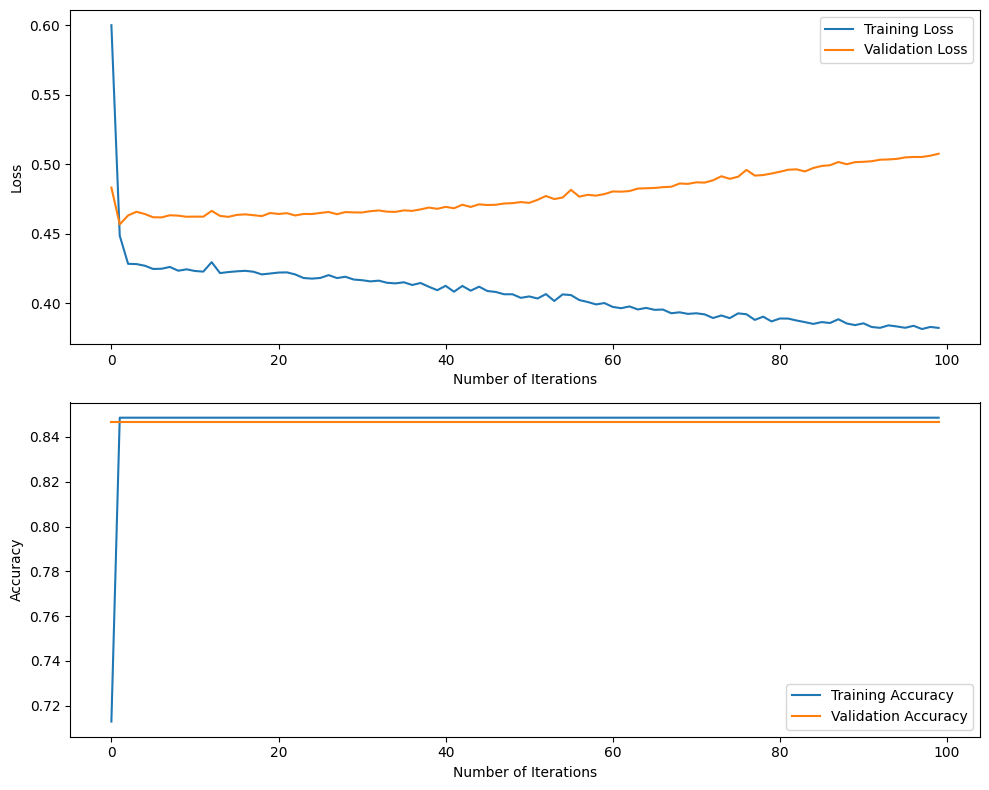

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8348 - loss: 0.4897 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
classification report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       116
           1       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
def dl_model(X_train, X_test, Y_train, Y_test):
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # model summary
    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

    hist = model.fit(X_train, Y_train, epochs=100,validation_data=(X_test, Y_test))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot loss and validation loss on the first subplot
    ax1.plot(hist.history['loss'], label='Training Loss')
    ax1.plot(hist.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy and validation accuracy on the second subplot
    ax2.plot(hist.history['accuracy'], label='Training Accuracy')
    ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Number of Iterations')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return model


model = dl_model(X_train, X_test, Y_train, Y_test)

model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

print("classification report : \n", classification_report(Y_test, y_pred))

Without adam optimizer

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8688 - loss: 0.6880 - val_accuracy: 0.8467 - val_loss: 0.5021
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8538 - loss: 0.4274 - val_accuracy: 0.8467 - val_loss: 0.5078
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8687 - loss: 0.3974 - val_accuracy: 0.8467 - val_loss: 0.4909
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8563 - loss: 0.4344 - val_accuracy: 0.8467 - val_loss: 0.4933
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8302 - loss: 0.4626 - val_accuracy: 0.8467 - val_loss: 0.5580
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8318 - loss: 0.4755 - val_accuracy: 0.8467 - val_loss: 0.4867
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8297 - loss: 0.4457 - val_accuracy: 0.8467 - val_loss: 0.5350
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8410 - loss: 0.4532 - val_accuracy: 0.8467 -

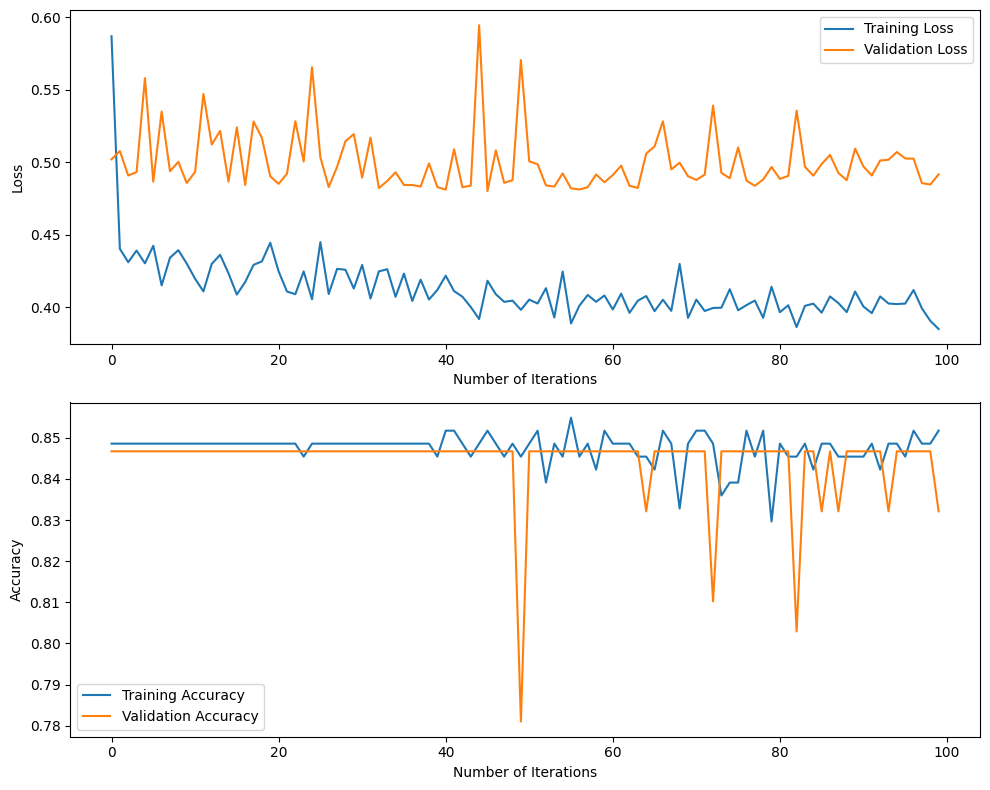

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8190 - loss: 0.4824  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
classification report : 
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       116
           1       0.00      0.00      0.00        21

    accuracy                           0.83       137
   macro avg       0.42      0.49      0.45       137
weighted avg       0.72      0.83      0.77       137



In [6]:
def dl_model(X_train, X_test, Y_train, Y_test):
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # model summary
    model.summary()

    model.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

    hist = model.fit(X_train, Y_train, epochs=100,
                     validation_data=(X_test, Y_test))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot loss and validation loss on the first subplot
    ax1.plot(hist.history['loss'], label='Training Loss')
    ax1.plot(hist.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy and validation accuracy on the second subplot
    ax2.plot(hist.history['accuracy'], label='Training Accuracy')
    ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Number of Iterations')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return model


model = dl_model(X_train, X_test, Y_train, Y_test)

model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

print("classification report : \n", classification_report(Y_test, y_pred))